# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

## Descubrimiento de sitios de unión de factores de transcipción en ADN.

La regulación de les expresión es un proceso complejo que involucra muchos mecanismos de control, que incluyen la estructura de la cromatina y la unión a secuencias de ADN por medio de proteínas denominadas Factores de transcriopción. Estos factores de transcripción se unen a secuencias de ADN especificas, denominadas sitios de unión a factores de transcripción (Transcription factors binding sites), la interacción entre los TFs y los TFBS permite controlar la transcripción. 

<img src="../imagenes/TFBS.png" width="400" height="400"/>

Convencionalmente, los TFBS tienen una longitud de entre 6-12 pb. La identificación de este tipos de secuencias es crucial para entender como se controla la regulación genética. Sin embargo, la identificación de estas secuencias es un gran desafio debido a que una busqueda masiva a nivel genómico resulta en un número muy alto de coinsidencias y por lo tanto de muchos falso postivos. 

Tenemos un dataset que consiste de secuencias de ADN de longitud de 50 pb. Estos datos fueron etiquetados con 0 y 1 , donde 1 corresponde a las secuencias que tienen el motivo regulatorio en este caso: CGACCGAACTCC.

## ¿Pueden crear un modelo que permita clasificar si una secuencia es tiene un sitio de unión a factores de transcrición?

Las redes neuronales convolucionales con one-hot encoding son un tipo de arquitectura de redes neuronales que se utilizan comúnmente para el procesamiento y análisis de datos secuenciales, como las secuencias de ADN.

En el contexto de las redes neuronales, el one-hot encoding es una técnica para representar datos categóricos en forma de vectores binarios. En el caso de las secuencias de ADN, cada nucleótido (A, C, G, T) se representa como un vector binario de tamaño igual al número de posibles categorías. Por ejemplo, si se utiliza el one-hot encoding, la base "A" se representa como [1, 0, 0, 0], la base "C" como [0, 1, 0, 0], la base "G" como [0, 0, 1, 0], y la base "T" como [0, 0, 0, 1].

Las redes convolucionales con one-hot encoding aprovechan esta representación para procesar secuencias de ADN. La capa convolucional en estas redes aplica filtros a las secuencias de ADN codificadas en one-hot encoding, lo que permite extraer características y patrones relevantes en la secuencia. Estos filtros son pequeñas ventanas que se deslizan sobre la secuencia y realizan operaciones de convolución.

Después de la etapa de convolución, se pueden aplicar capas de pooling (como la capa MaxPooling) para reducir la dimensionalidad y preservar las características más importantes. Luego, los resultados se aplanan y se conectan a capas densas (fully connected) para realizar la clasificación final.

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
seed_value = 52

# Establecer la semilla para NumPy
np.random.seed(seed_value)

# Establecer la semilla para TensorFlow
tf.random.set_seed(seed_value)

In [38]:
# Función para verificar la longitud uniforme de las secuencias
def verificar_longitud(secuencias):
    longitud = len(secuencias[0])
    for secuencia in secuencias:
        if len(secuencia) != longitud:
            return False
    return True

In [39]:
# Función para preprocesar las secuencias y convertirlas a one-hot encoding
def preprocesar_secuencias(secuencias):
    nucleotidos = ['A', 'C', 'G', 'T']
    secuencias_codificadas = []
    for secuencia in secuencias:
        secuencia_codificada = []
        for nucleotido in secuencia:
            one_hot = [int(nucleotido == base) for base in nucleotidos]
            secuencia_codificada.append(one_hot)
        secuencias_codificadas.append(secuencia_codificada)
    return np.array(secuencias_codificadas)


In [40]:
# Cargar los datos desde un archivo CSV
dataframe = pd.read_csv('../Datos/DNAbinding.csv')
dataframe.head()

,secuencias,etiquetas
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...,0
1,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...,0
2,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...,0
3,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...,1
4,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...,1


In [41]:
secuencias = dataframe['secuencias'].tolist()
etiquetas = dataframe['etiquetas'].tolist()

In [42]:
# Verificar la longitud de las secuencias
if not verificar_longitud(secuencias):
    print("Error: Las secuencias tienen diferentes longitudes.")
    exit()

In [43]:
# Preprocesar las secuencias y etiquetas
secuencias_codificadas = preprocesar_secuencias(secuencias)
etiquetas = np.array(etiquetas)


In [50]:
# Dividir el dataset en conjuntos de entrenamiento, prueba y validación
# dividir las secuencias codificadas (secuencias_codificadas) y las etiquetas (etiquetas) en conjuntos de entrenamiento (80% de los datos), prueba (10% de los datos) y validación (10% de los datos)
X_train, X_test, y_train, y_test = train_test_split(secuencias_codificadas, etiquetas, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [51]:
# Crear el modelo de la CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=12, activation='relu', input_shape=(50, 4)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 39, 32)            1568      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 288)               0         
                                                                 
 dense_10 (Dense)            (None, 16)                4624      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
____________________________________________________

In [52]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
# Entrenar el modelo
history =model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)


Epoch 1/50
40/40 [==============================] - 1s 10ms/step - loss: 0.6422 - accuracy: 0.6687 - val_loss: 0.5867 - val_accuracy: 0.7125
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.8359 - val_loss: 0.3756 - val_accuracy: 0.8687
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3059 - accuracy: 0.8969 - val_loss: 0.2549 - val_accuracy: 0.9156
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2022 - accuracy: 0.9555 - val_loss: 0.1952 - val_accuracy: 0.9344
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9695 - val_loss: 0.1343 - val_accuracy: 0.9688
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0943 - accuracy: 0.9844 - val_loss: 0.1061 - val_accuracy: 0.9812
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0697 - accuracy: 0.9875 - val_loss: 0.0870 - val_accuracy: 0.9781
Epoch 8/50
40/40 [=

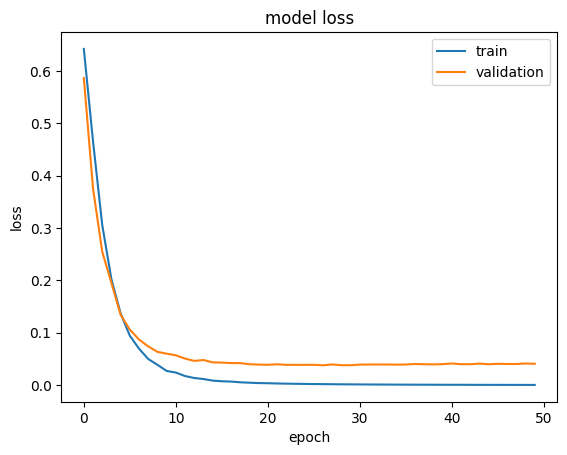

In [54]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
     

In [55]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9950
Loss:  0.006429615430533886
Accuracy:  0.9950000047683716
